In [1]:
from bs4 import BeautifulSoup as bs
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
page = 1
prices = []
while page != 50:
      url = f"https://bina.az/baki/alqi-satqi/menziller/yeni-tikili?page={page}"
      response = requests.get(url)
      html = response.content
      soup = bs(html, "lxml")
      for div in soup.find_all("div", class_="price"):
            prices.append(div.get_text(strip=True))
      page = page + 1

In [3]:
page = 1
location = []
while page != 50:
      url = f"https://bina.az/baki/alqi-satqi/menziller/yeni-tikili?page={page}"
      response = requests.get(url)
      html = response.content
      soup = bs(html, "lxml")
      for div in soup.find_all("div", class_="location"):
            location.append(div.get_text(strip=True))
      page = page + 1

In [4]:
page = 1
name = []
while page != 50:
      url = f"https://bina.az/baki/alqi-satqi/menziller/yeni-tikili?page={page}"
      response = requests.get(url)
      html = response.content
      soup = bs(html, "lxml")
      for ul in soup.find_all("ul", class_="name"):
            name.append(ul.get_text(strip=True))
      page = page + 1

In [5]:
page = 1
elan_tarixi = []
while page != 50:
      url = f"https://bina.az/baki/alqi-satqi/menziller/yeni-tikili?page={page}"
      response = requests.get(url)
      html = response.content
      soup = bs(html, "lxml")
      for div in soup.find_all("div", class_="city_when"):
            elan_tarixi.append(div.get_text(strip=True))
      page = page + 1

In [6]:
data = pd.DataFrame(
    {'price': prices,
     'location': location,
     'name': name,
     'elan_tarixi':elan_tarixi
    })


In [7]:
data.head()

,price,location,name,elan_tarixi
0,136 500AZN,Elmlər Akademiyası m.,2 otaqlı96 m²5/16 mərtəbə,"Bakı, 24 yanvar 2022"
1,118 000AZN,Nəsimi m.,3 otaqlı149 m²13/18 mərtəbə,"Bakı, bugün 11:28"
2,655 000AZN,Elmlər Akademiyası m.,3 otaqlı63 m²3/18 mərtəbə,"Bakı, 28 yanvar 2022"
3,223 000AZN,Xətai r.,3 otaqlı155.6 m²6/19 mərtəbə,"Bakı, dünən 14:33"
4,179 350AZN,Yasamal r.,2 otaqlı75.2 m²,"Bakı, dünən 14:50"


In [101]:
data.shape

(1568, 4)

In [8]:
data['price'] = data['price'].map(lambda x: str(x)[:-3])

In [11]:
data['elan_location'] = data['elan_tarixi'].str.split(',').str[0]

In [13]:
data['vaxt'] = data['elan_tarixi'].str[-5:]


In [15]:
data['Otaq sayi'] = data['name'].str.split('l').str[0]

In [16]:
data['Sahe'] = data['name'].str.split('m²').str[0]

In [17]:
data['Sahe'] = data['Sahe'].str.split('ı').str[1]

In [18]:
data['Mertebe'] = data['name'].str.split('m²').str[1]

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   price          1568 non-null   object
 1   location       1568 non-null   object
 2   name           1568 non-null   object
 3   elan_tarixi    1568 non-null   object
 4   elan_location  1568 non-null   object
 5   vaxt           1568 non-null   object
 6   Otaq sayi      1568 non-null   object
 7   Sahe           1568 non-null   object
 8   Mertebe        1568 non-null   object
dtypes: object(9)
memory usage: 110.4+ KB


In [22]:
data=data.drop(['name','elan_tarixi'],axis=1)

In [27]:
data['Otaq sayi'] = data['Otaq sayi'].map(lambda x: str(x)[:-4])

In [45]:
data['Otaq sayi']=data['Otaq sayi'].apply(pd.to_numeric)

In [47]:
data['Sahe']=data['Sahe'].apply(pd.to_numeric)

In [41]:
data.price = data.price.str.replace(' ', '')

In [61]:
data["price"] = pd.to_numeric(data["price"], downcast="float")

In [51]:
data= data.replace(r'^\s*$', np.NaN, regex=True)

In [53]:
data.isnull().sum()

price              0
location           0
elan_location      0
vaxt               0
Otaq sayi          0
Sahe               0
Mertebe          226
dtype: int64

In [54]:
data['Mertebe'].fillna(data['Mertebe'].mode()[0], inplace=True)

In [63]:
data['hersaheye dushen qiymet']=data['price']/data['Sahe']

In [68]:
data['location'].value_counts()

Nəsimi r.               139
Bakı                    118
Nərimanov r.            109
Şah İsmayıl Xətai m.     98
Yasamal r.               81
                       ... 
Böyükşor q.               1
2-ci mikrorayon q.        1
Sahil q.                  1
Suraxanı r.               1
Köhnə Günəşli q.          1
Name: location, Length: 69, dtype: int64

In [69]:
data['elan_location'].value_counts()

Bakı    1568
Name: elan_location, dtype: int64

In [71]:
data=data.drop('elan_location',axis=1)

In [72]:
data['Otaq sayi'].value_counts()

3    684
2    512
4    228
1    106
5     20
6     12
7      4
8      2
Name: Otaq sayi, dtype: int64

<IPython.core.display.Javascript object>

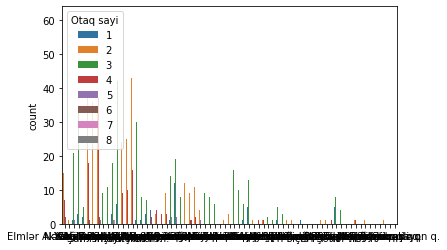

In [75]:
sns.countplot(data=data, x=location, hue='Otaq sayi')

<IPython.core.display.Javascript object>

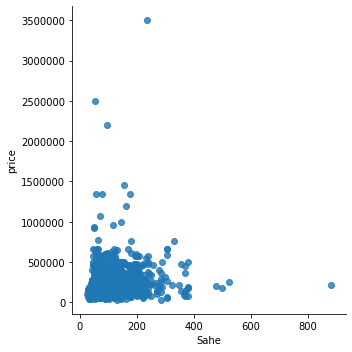

In [76]:
sns.lmplot(data=data, x='Sahe', y='price', fit_reg=False)

<IPython.core.display.Javascript object>

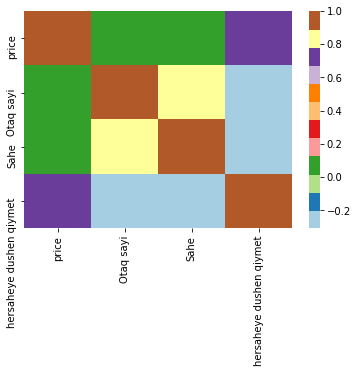

In [79]:
sns.heatmap(data.corr(), cmap="Paired")

<IPython.core.display.Javascript object>

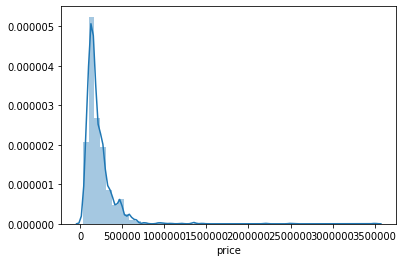

In [82]:
sns.distplot(data['price'])

<IPython.core.display.Javascript object>

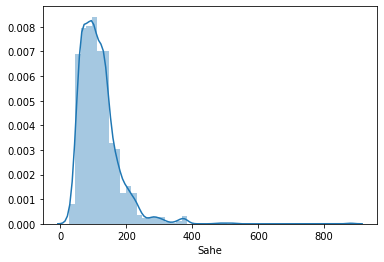

In [83]:
sns.distplot(data['Sahe'])

<IPython.core.display.Javascript object>

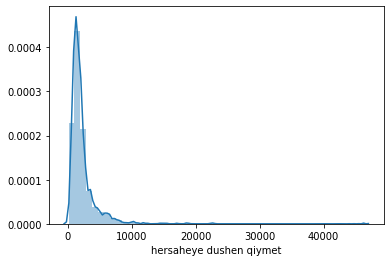

In [84]:
sns.distplot(data['hersaheye dushen qiymet'])

<IPython.core.display.Javascript object>

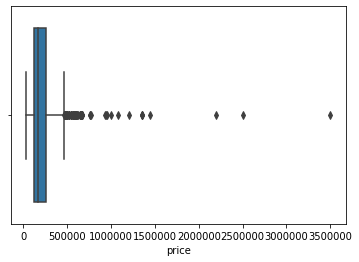

In [85]:
sns.boxplot(data['price'])

<IPython.core.display.Javascript object>

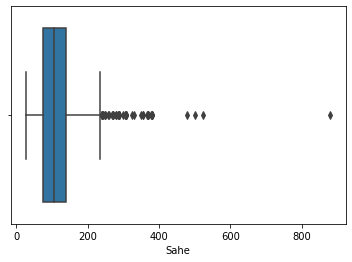

In [86]:
sns.boxplot(data['Sahe'])

<IPython.core.display.Javascript object>

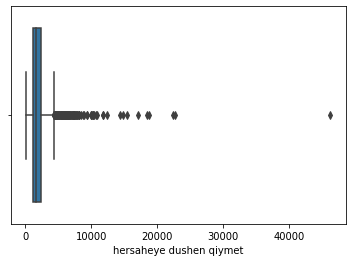

In [87]:
sns.boxplot(data['hersaheye dushen qiymet'])

<IPython.core.display.Javascript object>

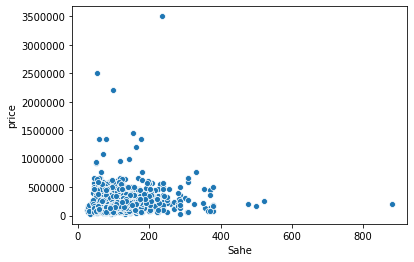

In [90]:
sns.scatterplot(data=data,x='Sahe',y='price')

<IPython.core.display.Javascript object>

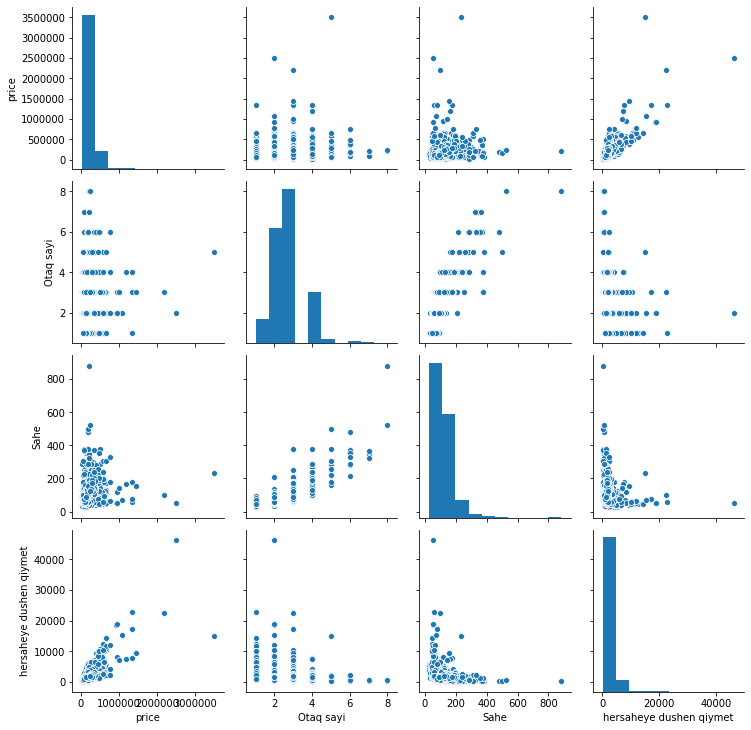

In [91]:
sns.pairplot(data)